In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv('fund_train.csv')
test=pd.read_csv('fund_test.csv')

cat=pd.DataFrame()
cat_test=pd.DataFrame()
train.head(2)


,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0


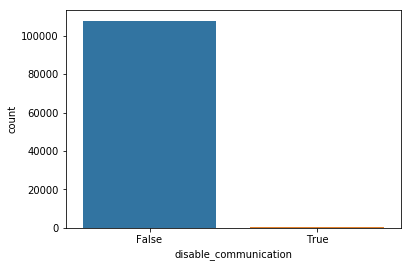

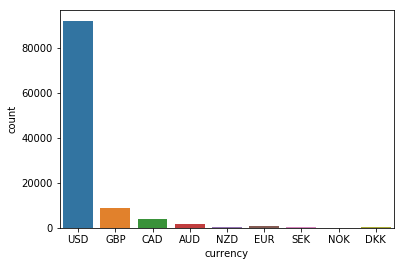

In [2]:
cat['disable_communication']=train['disable_communication']
cat['disable_communication'].isnull().sum()
sns.countplot(x='disable_communication',data=cat)
plt.show()

cat_test['disable_communication']=test['disable_communication']


cat['country']=train['country']
cat['country'].isnull().sum()

cat_test['country']=test['country']


cat['currency']=train['currency']
cat['currency'].isnull().sum()
sns.countplot(x='currency',data=cat)
plt.show()

cat_test['currency']=test['currency']


In [3]:
# Changing unix time to standard time
import time
cols =  ['deadline','state_changed_at','launched_at','created_at']
for col in cols:
    train[col] = train[col].apply(lambda k: time.ctime(k))
    test[col] = test[col].apply(lambda k: time.ctime(k))

    
cols =  ['deadline','state_changed_at','launched_at','created_at']
for col in cols:
    train[col] = pd.to_datetime(train[col])
    test[col] = pd.to_datetime(test[col])

In [8]:
cat['deadline_year'] = train["deadline"].dt.year
cat['deadline_month'] = train["deadline"].dt.month
cat['deadline_day'] = train["deadline"].dt.day
cat['deadline_hour'] = train["deadline"].dt.hour

cat['state_changed_at_year'] = train["state_changed_at"].dt.year
cat['state_changed_at_month'] = train["state_changed_at"].dt.month
cat['state_changed_at_day'] = train["state_changed_at"].dt.day
cat['state_changed_at_hour'] = train["state_changed_at"].dt.hour

cat['created_at_year'] = train["created_at"].dt.year
cat['created_at_month'] = train["created_at"].dt.month
cat['created_at_day'] = train["created_at"].dt.day
cat['created_at_hour'] = train["created_at"].dt.hour

cat['launched_at_year'] = train["launched_at"].dt.year
cat['launched_at_month'] = train["launched_at"].dt.month
cat['launched_at_day'] = train["launched_at"].dt.day
cat['launched_at_hour'] = train["launched_at"].dt.hour


In [9]:
cat_test['deadline_year'] = test["deadline"].dt.year
cat_test['deadline_month'] = test["deadline"].dt.month
cat_test['deadline_day'] = test["deadline"].dt.day
cat_test['deadline_hour'] = test["deadline"].dt.hour

cat_test['state_changed_at_year'] = test["state_changed_at"].dt.year
cat_test['state_changed_at_month'] = test["state_changed_at"].dt.month
cat_test['state_changed_at_day'] = test["state_changed_at"].dt.day
cat_test['state_changed_at_hour'] = test["state_changed_at"].dt.hour

cat_test['created_at_year'] = test["created_at"].dt.year
cat_test['created_at_month'] = test["created_at"].dt.month
cat_test['created_at_day'] = test["created_at"].dt.day
cat_test['created_at_hour'] = test["created_at"].dt.hour

cat_test['launched_at_year'] = test["launched_at"].dt.year
cat_test['launched_at_month'] = test["launched_at"].dt.month
cat_test['launched_at_day'] = test["launched_at"].dt.day
cat_test['launched_at_hour'] = test["launched_at"].dt.hour


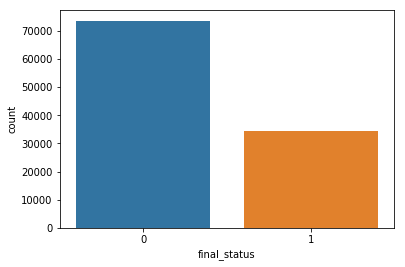

In [10]:
num =pd.DataFrame()
num_test =pd.DataFrame()

num['final_status']=train['final_status']
sns.countplot(x='final_status',data=num)
plt.show()


C:\Users\ASHU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


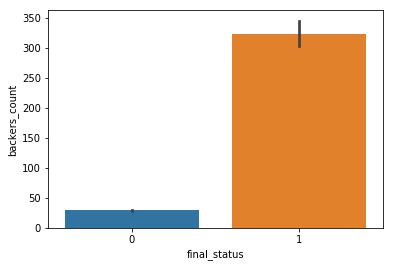

In [11]:
num['backers_count']=train['backers_count']
sns.barplot(x = 'final_status', y = 'backers_count', data = num)
plt.show()


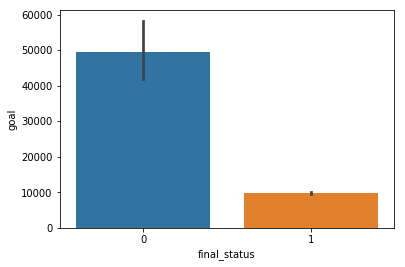

,goal,backers_count
0,7000.0,0
1,35000.0,0


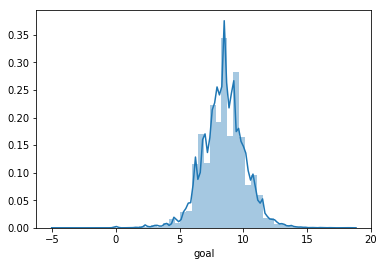

In [12]:
num['goal']=train['goal']
sns.barplot(x = 'final_status', y = 'goal', data = num)
plt.show()
z=np.log(num['goal'])
sns.distplot(z)

num_test['goal']=test['goal']
num_test['backers_count']=0
num_test.head(2)

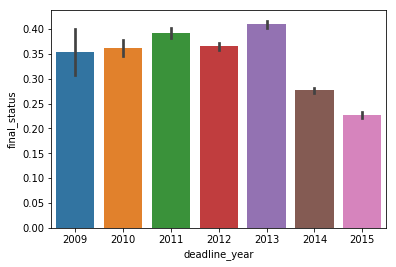

In [13]:
sns.barplot(x =cat['deadline_year'] , y =num['final_status'] )
plt.show()

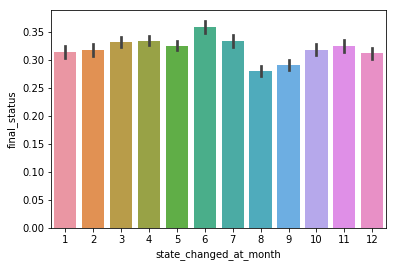

In [14]:
sns.barplot(x =cat['state_changed_at_month'] , y =num['final_status'] )
plt.show()

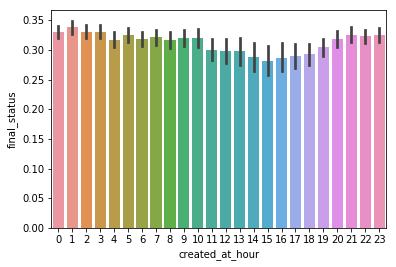

In [15]:
sns.barplot(x =cat['created_at_hour'] , y =num['final_status'] )
plt.show()

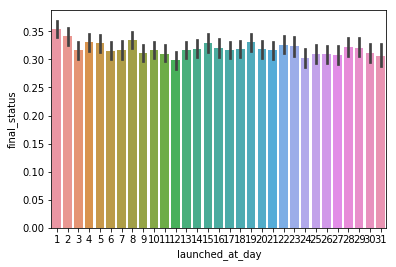

In [33]:
sns.barplot(x =cat['launched_at_day'] , y =num['final_status'] )
plt.show()

In [16]:
cat['country'].value_counts()
cat_test['country'].value_counts()

US    43129
GB     6900
CA     3275
AU     1846
DE     1633
FR     1255
IT     1127
ES      904
NL      686
SE      454
NZ      339
DK      300
CH      292
BE      274
IE      249
AT      223
NO      189
MX      172
SG      114
HK       82
LU       22
Name: country, dtype: int64

In [17]:
#  for test data

cat_test["country"] = cat_test["country"].replace(['US','CA','MX'], 'North-America')
cat_test["country"] = cat_test["country"].replace(['GB','DE','DK','CH','IE','FR','ES','NL','LU'], 'Europe')
cat_test["country"] = cat_test["country"].replace(['AU','NZ'], 'Australia')
cat_test["country"] = cat_test["country"].replace(['IT','AT'], 'Africa')
cat_test["country"] = cat_test["country"].replace(['BF','SE','SG','HK'], 'Asia')
cat_test["country"] = cat_test["country"].replace(['NO'], 'South-America')

cat_test["country"] = cat_test["country"].map({"North-America":0, "Europe":1,"Australia":2, "Africa":3,"Asia":4,"South-America":5})
# cat_test["workclass"] = cat_test["workclass"].astype(int)
cat_country_test_one_hot = pd.get_dummies(cat_test["country"], 
                                     prefix='country')
cat_country_test_one_hot.head()


cat["country"] = cat["country"].replace(['US','CA'], 'North-America')
cat["country"] = cat["country"].replace(['GB','DE','DK','CH','IE'], 'Europe')
cat["country"] = cat["country"].replace(['AU','NZ'], 'Australia')
# cat["country"] = cat["country"].replace(['IT','AT'], 'Africa')
cat["country"] = cat["country"].replace(['SE','SG'], 'Asia')
cat["country"] = cat["country"].replace(['NO'], 'South-America')

cat["country"] = cat["country"].map({"North-America":0, "Europe":1,"Australia":2,"Asia":3,"South-America":4})
# cat["workclass"] = cat["workclass"].astype(int)
cat_country_one_hot = pd.get_dummies(cat["country"], 
                                     prefix='country')
cat_country_one_hot['country_5.0']=0


In [18]:
cat['currency'].value_counts()
cat_test['currency'].value_counts()

USD    43129
GBP     6900
EUR     6373
CAD     3275
AUD     1846
SEK      454
NZD      339
DKK      300
CHF      292
NOK      189
MXN      172
SGD      114
HKD       82
Name: currency, dtype: int64

In [19]:
cat["currency"] = cat["currency"].replace(['USD','CAD'], 'North-America')
cat["currency"] = cat["currency"].replace(['GBP','EUR','DKK','NOK'], 'Europe')
cat["currency"] = cat["currency"].replace(['AUD','NZD'], 'Australia')
# cat["country"] = cat["country"].replace(['IT','AT'], 'Africa')
cat["currency"] = cat["currency"].replace(['SEK'], 'Asia')
# cat["currency"] = cat["currency"].replace(['NO'], 'South-America')

cat["currency"] = cat["currency"].map({"North-America":0, "Europe":1,"Australia":2,"Asia":3})
# cat["workclass"] = cat["workclass"].astype(int)
cat_currency_one_hot = pd.get_dummies(cat["currency"], 
                                     prefix='currency')
cat_currency_one_hot.head()

,currency_0,currency_1,currency_2,currency_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [20]:
cat_test["currency"] = cat_test["currency"].replace(['USD','CAD','MXN'], 'North-America')
cat_test["currency"] = cat_test["currency"].replace(['GBP','EUR','DKK','NOK','CHF'], 'Europe')
cat_test["currency"] = cat_test["currency"].replace(['AUD','NZD'], 'Australia')
# cat["country"] = cat["country"].replace(['IT','AT'], 'Africa')
cat_test["currency"] = cat_test["currency"].replace(['SEK','SGD','HKD'], 'Asia')
# cat["currency"] = cat["currency"].replace(['NO'], 'South-America')

cat_test["currency"] = cat_test["currency"].map({"North-America":0, "Europe":1,"Australia":2,"Asia":3})
# cat["workclass"] = cat["workclass"].astype(int)
cat_currency_test_one_hot = pd.get_dummies(cat_test["currency"], 
                                     prefix='currency')
cat_currency_test_one_hot.head()

,currency_0,currency_1,currency_2,currency_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [22]:
cat["disable_communication"] = np.where(cat["disable_communication"]==True,1,0)

cat.head()

cat_test["disable_communication"] = np.where(cat_test["disable_communication"]==True,1,0)

cat_test.head()

cat_con_enc = pd.concat([cat_country_one_hot, 
                        cat_currency_one_hot] 
                        ,axis=1)
final=pd.concat([num,cat_con_enc,cat],axis=1)

y=final['final_status']
final.drop(['country','currency','final_status'],axis=1,inplace=True)
final.columns

cat_test_con_enc = pd.concat([cat_country_test_one_hot, 
                        cat_currency_test_one_hot] 
                        , axis=1)
final_test=pd.concat([num_test,cat_test_con_enc,cat_test],axis=1)

# y=final['final_status']
final_test.drop(['country','currency'],axis=1,inplace=True)
final.columns


Index(['backers_count', 'goal', 'country_0.0', 'country_1.0', 'country_2.0',
       'country_3.0', 'country_4.0', 'country_5.0', 'currency_0', 'currency_1',
       'currency_2', 'currency_3', 'disable_communication', 'deadline_year',
       'deadline_month', 'deadline_day', 'deadline_hour',
       'state_changed_at_year', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_hour', 'created_at_year',
       'created_at_month', 'created_at_day', 'created_at_hour',
       'launched_at_year', 'launched_at_month', 'launched_at_day',
       'launched_at_hour'],
      dtype='object')

In [23]:
final_test.head()


,goal,backers_count,country_0.0,country_1.0,country_2.0,country_3.0,country_4.0,country_5.0,currency_0,currency_1,...,state_changed_at_day,state_changed_at_hour,created_at_year,created_at_month,created_at_day,created_at_hour,launched_at_year,launched_at_month,launched_at_day,launched_at_hour
0,7000.0,0,1,0,0,0,0,0,1,0,...,9,5,2015,10,28,8,2015,10,30,4
1,35000.0,0,1,0,0,0,0,0,1,0,...,22,9,2015,12,17,1,2015,12,18,9
2,49500.0,0,1,0,0,0,0,0,1,0,...,3,5,2015,11,27,5,2015,11,28,6
3,40000.0,0,1,0,0,0,0,0,1,0,...,17,0,2015,8,31,2,2015,9,17,0
4,20000.0,0,1,0,0,0,0,0,1,0,...,1,7,2016,2,18,8,2016,3,19,2


In [34]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(final,y,test_size=0.20)
X_train=final
y_train=y
X_train.columns
X_test=final_test


In [25]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
def fit_ml_algo(algo,X_train,y_train,cv):
    # first pass
    model=algo.fit(X_train,y_train)
    acc=round(model.score(X_train,y_train)*100,2)
    
    # Cross Validation
    train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    
    #Cross validation accuracy matrix
    
    acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
    return train_pred,acc,acc_cv

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

import warnings
warnings.filterwarnings('ignore')


In [27]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 81.73
Accuracy CV 10-Fold: 81.63


In [28]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 100.0
Accuracy CV 10-Fold: 75.57


In [47]:
knn=KNeighborsClassifier(n_neighbors=14)
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(knn, 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 87.95
Accuracy CV 10-Fold: 85.65


In [30]:
model=GradientBoostingClassifier(n_estimators=150)
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(model, 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 87.88
Accuracy CV 10-Fold: 69.55


In [41]:
from xgboost import XGBClassifier
mod=XGBClassifier(n_estimators=150)
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(mod, 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 87.88
Accuracy CV 10-Fold: 70.95


In [57]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
clf=SGDClassifier(max_iter=1000, tol=1e-3)
# clf.fit(X_train, Y_train)

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(clf, 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 84.99
Accuracy CV 10-Fold: 81.59


In [62]:
# Finally selecting KNeighbour Classifier

predictions =knn.predict(X_test)
predictions[:20]

# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['project_id'] = test['project_id']
submission['final_status'] = predictions # our model predictions on the test dataset
submission['final_status'].value_counts()

submission.to_csv('submission_prjt_fund.csv',index=False)
